# Student Performance Analysis

##Load the required Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MP2_Data.csv to MP2_Data.csv


### Importing required packages and libraries

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


##Data Preprocessing




In [ ]:
data= pd.read_csv('MP2_Data.csv')
data=data.sort_index(axis=1)
data.head()

,Grade,ID,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Quiz1,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_MP1,Week3_PR1,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Quiz2,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_MP2,Week5_PR2,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Quiz3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_MP3,Week7_PR3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week8_Total,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
0,4,ML-2020-1,0,0,0,0,5.00,7,30,1,0,15.0,5.0,30,4,0,0,5.00,14,39,2,0,16.09,5.00,24,6,1,0,5.0,28,30,2,0,21.88,5.0,2,0,1,0,5,4,0,4,82.97,8,6,1,0
1,4,ML-2020-2,8,0,0,0,3.33,61,10,3,8,15.0,5.0,100,4,4,3,4.00,130,16,1,4,17.83,5.00,48,19,5,5,5.0,57,22,2,4,22.27,5.0,31,9,0,8,5,2,0,0,82.43,25,3,2,5
2,3,ML-2020-3,4,0,0,0,1.67,19,10,3,3,13.0,5.0,25,4,0,2,5.00,50,19,2,2,15.22,5.00,28,6,0,2,5.0,14,20,2,0,27.05,2.5,12,4,0,0,8,2,0,0,79.44,9,0,1,0
3,3,ML-2020-4,12,0,0,1,2.50,30,10,1,6,14.0,5.0,79,4,2,2,3.13,240,27,2,1,10.00,5.00,47,4,3,1,5.0,99,19,4,0,31.02,5.0,29,4,5,4,10,0,0,0,80.65,7,6,0,0
4,2,ML-2020-6,6,0,0,0,0.00,0,0,0,0,15.0,5.0,27,5,0,0,4.67,6,15,1,0,12.17,4.93,32,12,0,8,5.0,22,18,1,2,15.91,5.0,43,4,3,6,8,5,1,1,67.68,5,3,1,0


In [ ]:
# checking for null values
data.isnull().sum()    ## no attributes have missing values

Grade          0
ID             0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Quiz1    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_MP1      0
Week3_PR1      0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Quiz2    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_MP2      0
Week5_PR2      0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Quiz3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_MP3      0
Week7_PR3      0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week8_Total    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
dtype: int64

In [ ]:
# understanding the data
data.describe()  

,Grade,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Quiz1,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_MP1,Week3_PR1,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Quiz2,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_MP2,Week5_PR2,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Quiz3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_MP3,Week7_PR3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week8_Total,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
count,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.074766,6.785047,0.0,0.598131,0.224299,2.406636,16.88785,13.299065,1.252336,1.841121,7.949626,2.803738,31.728972,2.822430,0.953271,1.130841,2.609439,41.915888,16.046729,1.943925,1.009346,9.237757,2.844673,26.074766,5.009346,1.588785,0.663551,2.663551,37.607477,14.271028,2.775701,0.411215,14.481869,2.383178,16.355140,3.242991,1.813084,1.252336,10.514019,3.130841,1.112150,0.355140,47.380467,7.663551,1.607477,1.093458,0.046729
std,1.993863,7.157300,0.0,1.966031,0.730836,2.000317,16.30796,11.308049,1.505295,4.202761,6.892312,2.493158,28.686191,3.206165,2.689544,2.269919,2.229419,47.164330,17.040675,2.790928,2.806648,8.640610,2.482099,31.159269,6.568213,3.954823,1.822003,2.414359,47.851334,14.009815,7.206271,1.220526,14.080211,2.437501,22.242341,5.001587,4.895379,2.399267,15.563846,4.841028,3.658351,1.191577,41.035589,9.277630,2.687346,3.368928,0.483368
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.50000,10.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,0.0,0.000000,0.000000,3.330000,15.00000,11.000000,1.000000,0.000000,12.000000,5.000000,27.000000,4.000000,0.000000,0.000000,3.170000,27.000000,15.000000,1.000000,0.000000,10.870000,5.000000,20.000000,4.000000,0.000000,0.000000,4.000000,18.000000,15.000000,1.000000,0.000000,15.910000,2.500000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,71.530000,5.000000,0.000000,0.000000,0.000000
75%,4.000000,12.000000,0.0,0.000000,0.000000,4.170000,24.00000,19.000000,1.000000,2.000000,14.305000,5.000000,47.500000,4.000000,0.000000,1.000000,4.710000,74.500000,27.500000,2.000000,1.000000,18.045000,5.000000,40.500000,6.500000,1.000000,0.000000,5.000000,65.000000,25.000000,2.000000,0.000000,27.440000,5.000000,27.000000,5.000000,1.000000,2.000000,14.000000,5.000000,0.000000,0.000000,83.550000,11.000000,2.000000,0.500000,0.000000
max,5.000000,27.000000,0.0,11.000000,6.000000,5.000000,104.00000,57.000000,10.000000,25.000000,15.000000,5.000000,108.000000,15.000000,15.000000,14.000000,5.000000,240.000000,87.000000,13.000000,24.000000,20.000000,5.000000,185.000000,39.000000,23.000000,11.000000,5.000000,208.000000,51.000000,45.000000,7.000000,35.000000,5.000000,145.000000,24.000000,3

### Feature Scaling

From the above output, it is clear that column Week1_Stat1 is completely 0 so it can be discarded. Columns like ID and Week8_Total (redundant to Grade) are removed too. A new dataframe is created with aggregated columns of the dataset to reduce feature dimensionality. 

In [ ]:
data=data.drop(columns=['ID','Week1_Stat1','Week8_Total'])
new_data=pd.DataFrame()
new_data['Stat0']=data['Week1_Stat0']+data['Week2_Stat0']+data['Week3_Stat0']+data['Week4_Stat0']+data['Week5_Stat0']+data['Week6_Stat0']+data['Week7_Stat0']+data['Week8_Stat0']+data['Week9_Stat0']
new_data['Stat1']=data['Week2_Stat1']+data['Week3_Stat1']+data['Week4_Stat1']+data['Week5_Stat1']+data['Week6_Stat1']+data['Week7_Stat1']+data['Week8_Stat1']+data['Week9_Stat1']
new_data['Stat2']=data['Week1_Stat2']+data['Week2_Stat2']+data['Week3_Stat2']+data['Week4_Stat2']+data['Week5_Stat2']+data['Week6_Stat2']+data['Week7_Stat2']+data['Week8_Stat2']+data['Week9_Stat2']
new_data['Stat3']=data['Week1_Stat3']+data['Week2_Stat3']+data['Week3_Stat3']+data['Week4_Stat3']+data['Week5_Stat3']+data['Week6_Stat3']+data['Week7_Stat3']+data['Week8_Stat3']+data['Week9_Stat3']
new_data['Quiz']= data['Week2_Quiz1']+data['Week4_Quiz2']+data['Week6_Quiz3']
new_data['Mini Project'] = data['Week3_MP1']+data['Week5_MP2']+data['Week7_MP3']
new_data['Peer Review'] = data['Week3_PR1']+data['Week5_PR2']+data['Week7_PR3']
new_data['Grade']=data['Grade']
new_data.head()

,Stat0,Stat1,Stat2,Stat3,Quiz,Mini Project,Peer Review,Grade
0,118,119,8,4,15.00,52.97,15.00,4
1,465,85,17,37,12.33,55.10,15.00,4
2,169,65,8,9,11.67,55.27,12.50,3
3,553,74,17,15,10.63,55.02,15.00,3
4,149,62,7,17,9.67,43.08,14.93,2


The number of columns have reduced from 48 to 8

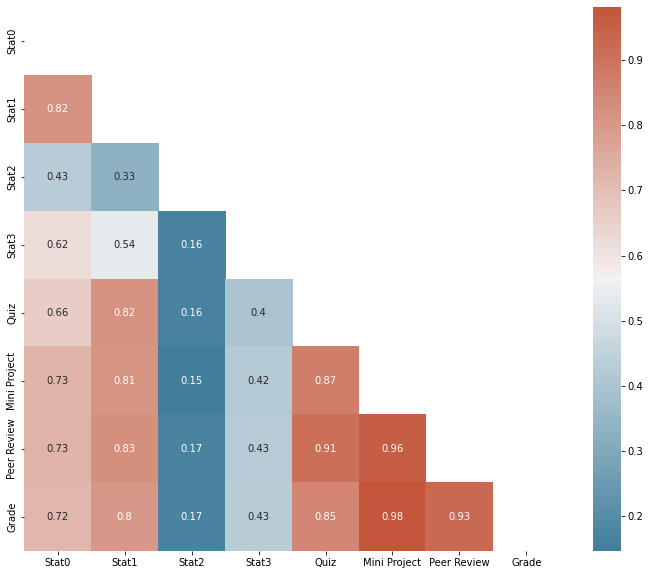

In [ ]:
# correlation of the new dataset
dcorr = new_data.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(dcorr, dtype=bool))
corrmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dcorr, annot=True, mask = mask, cmap=corrmap)

Grade is highly correlated with Mini Project, Peer Review, Quiz and Stat1 (assignment related)

### Exploratory Data Analysis
Understanding the Distributions of dataset attributes

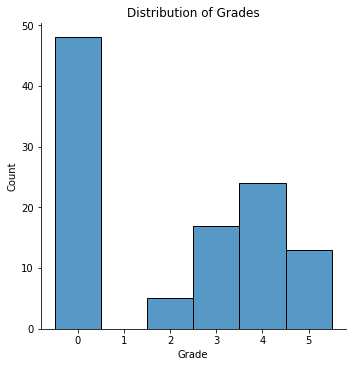

In [ ]:
# Distribution of Grades
sns.displot(new_data['Grade'],discrete=True).set(title='Distribution of Grades')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc67dc1d4d0>,
      dtype=object)

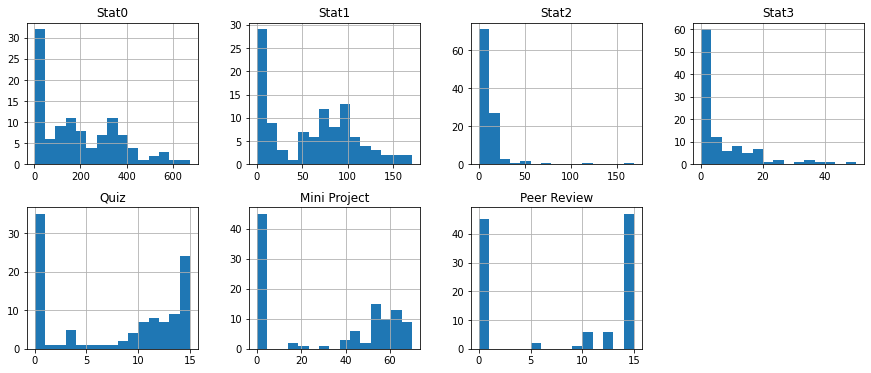

In [ ]:
# Distribution of all the features
x= new_data.drop(columns=['Grade'])
x.hist(bins=15, figsize=(15, 6), layout=(2, 4))

### Separating data into features and label

In [ ]:
x= new_data.drop(columns=['Grade'])
features=list(x.columns)
y=new_data['Grade']

### Creating Training and Testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=0)

###Standardizing the Data

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# Classification Approach1: Decision Tree Classifier

In [ ]:
###Before tuning the parameters of the model
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train,y_train)
# predicting values
y_pred = clf.predict(x_test)
#accuracy score
score1 = (accuracy_score(y_test, y_pred)*100).round(2)
print("Accuracy of the model before tuning the paramenters: ",score1,"%")

### After tuning the parameters of the model
clf2 = DecisionTreeClassifier(splitter='random',random_state=0,criterion='entropy')
clf2 = clf2.fit(x_train,y_train)
# predicting values
y_pred2 = clf2.predict(x_test)
score2 = (accuracy_score(y_test, y_pred2)*100).round(2)
print("Accuracy of the model after tuning the parameters is ",score2,"%")
#no good results after tuning

Accuracy of the model before tuning the paramenters:  87.88 %
Accuracy of the model after tuning the parameters is  72.73 %


In [ ]:
# confusion matrix
print(pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted']))

#classification report
print()
print(classification_report(y_test,y_pred))

Predicted   0  2  3  4  5
Actual                   
0          15  0  0  0  0
2           0  3  0  0  0
3           0  0  1  2  0
4           0  0  1  7  1
5           0  0  0  0  3

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.50      0.33      0.40         3
           4       0.78      0.78      0.78         9
           5       0.75      1.00      0.86         3

    accuracy                           0.88        33
   macro avg       0.81      0.82      0.81        33
weighted avg       0.87      0.88      0.87        33



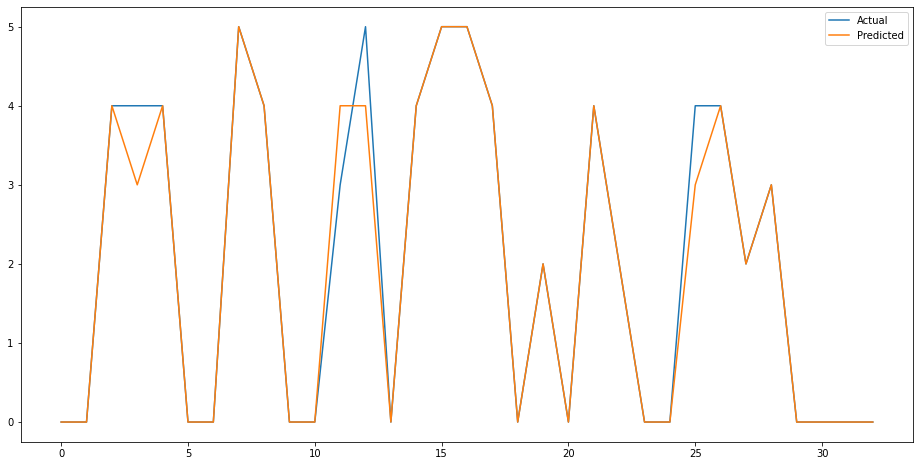

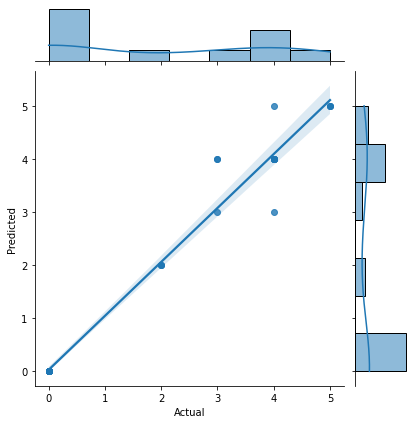

In [ ]:
# Visualizing actual vs predicted values of the classifier
viz = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
viz = viz.reset_index()
viz = viz.drop(['index'],axis=1)
plt.plot(viz)
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=viz,kind="reg")

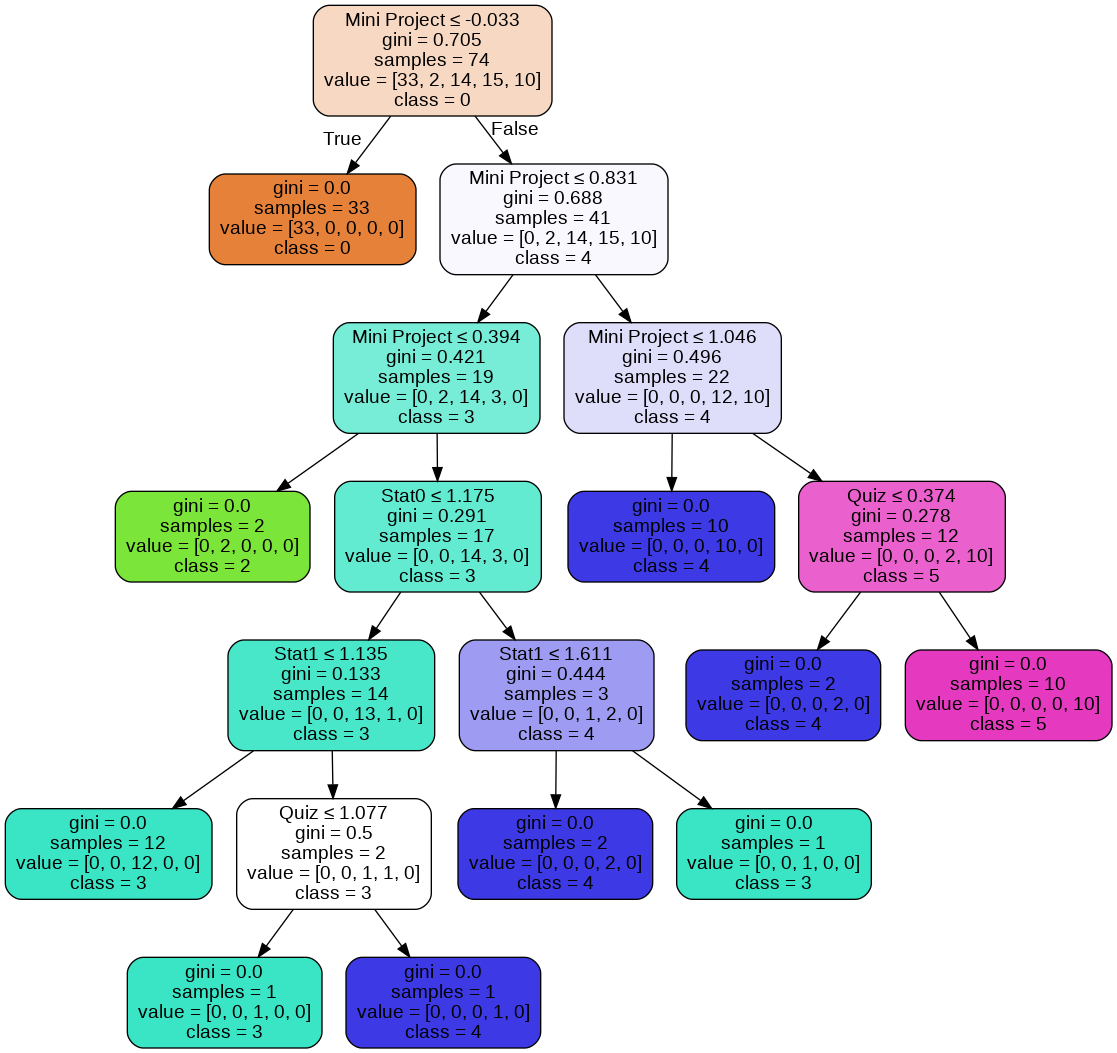

In [ ]:
#visualizing the decision tree
dot = StringIO()
export_graphviz(clf, out_file=dot,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','2','3','4','5'])
grh = pydotplus.graph_from_dot_data(dot.getvalue())  
Image(grh.create_png())

# Classification Approach2: RandomForest Classifier

In [ ]:
###Before tuning the parameters of the model

rfr = RandomForestRegressor(random_state=0)
rfr.fit(x_train,y_train)
# making predictions
predictedVal = rfr.predict(x_test)
# converting dtype 'float64' to 'int64' to match the target variable
predictedVal = np.round(predictedVal).astype('int64')
score = accuracy_score(y_test, predictedVal)
print("The accuracy of the model before tuning the parameters is ",(score*100).round(2),"%")
print()


### After tuning the parameters of the model
max = 0  #for finding the best accuracy
index=0  #for finding the best number of estimators to be used
for i in range(1,50):
  #creating the model
  rfr = RandomForestRegressor(n_estimators =i,random_state=0)
  rfr.fit(x_train,y_train)
  # making predictions
  predictedVal = rfr.predict(x_test)
  # converting dtype 'float64' to 'int64' to match the target variable
  predictedVal = np.round(predictedVal).astype('int64')
  score = accuracy_score(y_test, predictedVal)
  #finding the best tuning values
  if score>max:
    max=score
    index=i
    y_pred= predictedVal
    model2 = rfr
score3 = (max*100).round(2)
print("The accuracy of the model after tuning the parameters is ",score3,"% acheived with ",index," estimators")

#good accuracy after tuning parameters 

The accuracy of the model before tuning the parameters is  87.88 %

The accuracy of the model after tuning the parameters is  96.97 % acheived with  2  estimators


In [ ]:
#confusion matrix
print(pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted']))

#classification report
print()
print(classification_report(y_test,y_pred))

Predicted   0  2  3  4  5
Actual                   
0          15  0  0  0  0
2           0  3  0  0  0
3           0  0  2  1  0
4           0  0  0  9  0
5           0  0  0  0  3

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00         3

    accuracy                           0.97        33
   macro avg       0.98      0.93      0.95        33
weighted avg       0.97      0.97      0.97        33



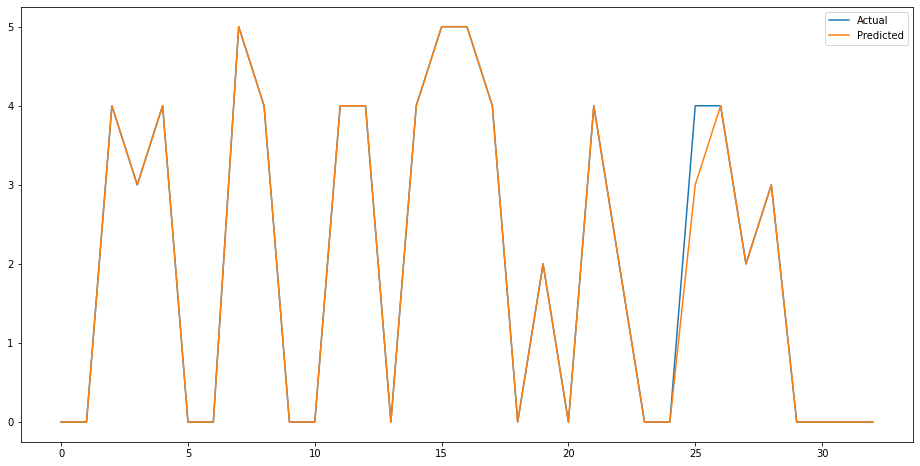

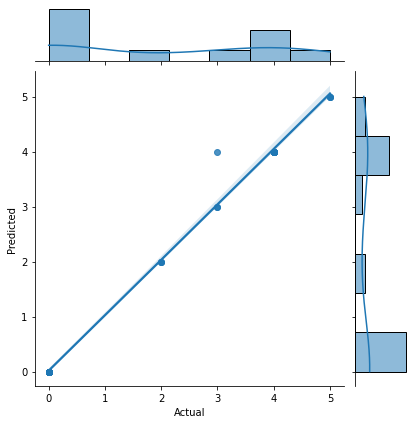

In [ ]:
# Visualizing actual vs predicted values of the classifier
viz = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
viz = viz.reset_index()
viz = viz.drop(['index'],axis=1)
plt.plot(viz)
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=viz,kind="reg")

Mini Project    0.523649
Peer Review     0.462049
Quiz            0.007608
dtype: float64


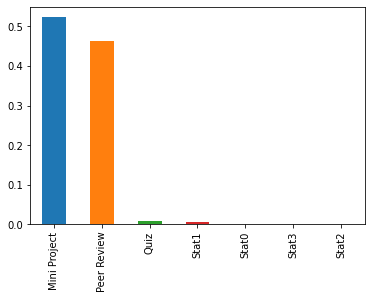

In [ ]:
# Finding the top 3 important features of random forest classifier
feature_imp = pd.Series(model2.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp.head(3))
feature_imp.plot(kind='bar', color= sns.color_palette())



<BarContainer object of 2 artists>

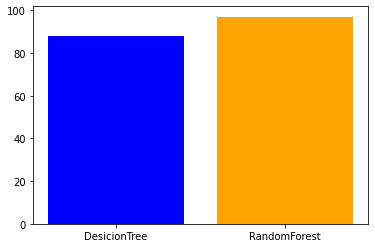

In [ ]:
# comparing two classifiers
x=['DesicionTree','RandomForest']
y=[score1,score3]
plt.bar(x,y,color=['blue','orange'])

Mini Project    0.841452
Quiz            0.083031
Stat1           0.041972
dtype: float64


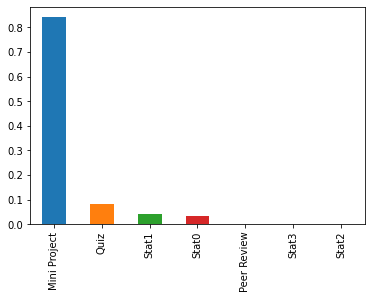

In [ ]:
# Finding the top 3 important features of decision tree classifier
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp.head(3))
feature_imp.plot(kind='bar', color= sns.color_palette())

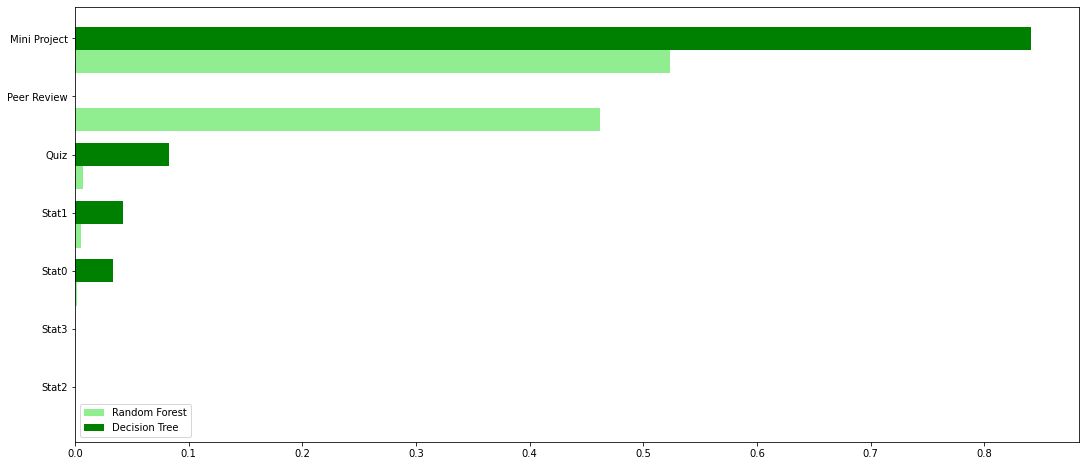

In [ ]:
# comparing feature importance od DecisionTree classifier and RandomForestClassifier
feature_import=pd.DataFrame({
    'rfc':model2.feature_importances_,
    'clf':clf.feature_importances_
},index=features)
feature_import.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_import))
f, ax = plt.subplots(figsize=(18,8))
rfc_feat=ax.barh(index,feature_import['rfc'],0.4,color='lightgreen',label='Random Forest')
dt_feat=ax.barh(index+0.4,feature_import['clf'],0.4,color='green',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_import.index)

ax.legend()
plt.show()